# Penguin Classification

Import libraries

## Preparation

In [38]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from matplotlib.colors import TwoSlopeNorm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler

Load the dataset from seaborn dataset library

In [3]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Data Summarization and Visualization

Shows the summary of the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Check missing values

In [5]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

We can see that there are some missing values in our column, so we going to drop all the samples with missing values

In [32]:
df = df.dropna()

In [33]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [34]:
df.describe()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.918919,0.651652,43.992793,17.164865,200.966967,4207.057057,0.504505
std,0.889718,0.714715,5.468668,1.969235,14.015765,805.215802,0.500732
min,0.000000,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,0.000000,0.000000,39.500000,15.600000,190.000000,3550.000000,0.000000
50%,1.000000,1.000000,44.500000,17.300000,197.000000,4050.000000,1.000000
75%,2.000000,1.000000,48.600000,18.700000,213.000000,4775.000000,1.000000
max,2.000000,2.000000,59.600000,21.500000,231.000000,6300.000000,1.000000


Visualize the correlation matrix

In [37]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_correlations(df):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

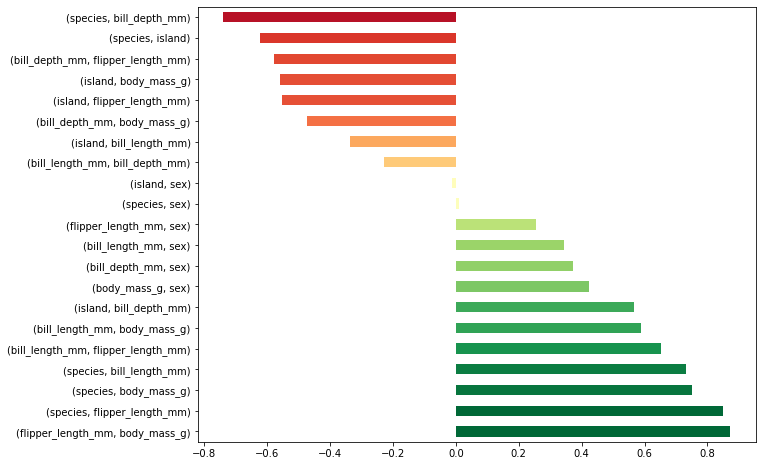

In [46]:
columns = list(df.columns)
correlation_plot = get_correlations(df[columns])

fig = plt.figure(figsize=(10, 8))
norm = TwoSlopeNorm(vmin=-.8, vcenter=0, vmax=.8)
colors = [plt.cm.RdYlGn(norm(c)) for c in correlation_plot.values]
correlation_plot.plot.barh(color=colors)
plt.show()

## Data Preparation

Encode the categorical data using label encoder

In [8]:
encoder = LabelEncoder()
df["species"] = encoder.fit_transform(df["species"])
df["island"] = encoder.fit_transform(df["island"])
df["sex"] = encoder.fit_transform(df["sex"])

Split the target and features variables

In [9]:
X = df.drop("species", axis=1)
y = pd.DataFrame(df["species"]).copy()

Split the data into the train and test set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Model Training

In this project, we are going to build a pipeline that will scale the features using standard scaler, then fit the data into a LightGBM classifier

Declare the scaler

In [11]:
scaler = StandardScaler()

Declare the classifier

In [12]:
clf = lgb.LGBMClassifier()

Create the pipeline

In [13]:
pipe = Pipeline([
    ("scaler", scaler),
    ("method", clf)
])

In [14]:
clf.fit(X_train, y_train.values.ravel())

LGBMClassifier()

In [15]:
y_train_pred = clf.predict(X_train)
print(f"Model accuracy on the training set : {accuracy_score(y_train, y_train_pred):.3f}")

Model accuracy on the training set : 1.000


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

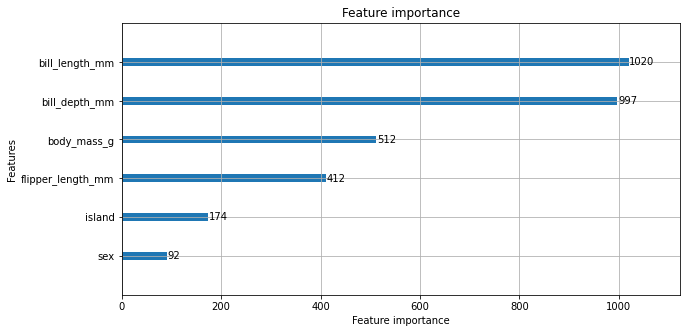

In [31]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
lgb.plot_importance(pipe.named_steps["method"], ax=ax)

## Model Evaluation

In [16]:
y_test_pred = clf.predict(X_test)
print(f"Model accuracy on the training set : {accuracy_score(y_test, y_test_pred):.3f}")

Model accuracy on the training set : 1.000


## Conclusion

In this project, we have build the model that able to classify penguin by its species.